# Step 0: 把資料下載到本地

In [1]:
import requests
import os

In [2]:
resp = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data")

In [3]:
resp.status_code

200

In [4]:
os.makedirs("data", exist_ok=True)
with open("data/hw1.csv", "w") as f:
    f.write(resp.text)

# Step 1-1: 讀入數據並檢查

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("data/hw1.csv", header=None)

In [7]:
# column names according to http://archive.ics.uci.edu/dataset/19/car+evaluation
#   buying:   vhigh, high, med, low.
#   maint:    vhigh, high, med, low.
#   doors:    2, 3, 4, 5, more.
#   persons:  2, 4, more.
#   lug_boot: small, med, big.
#   safety:   low, med, high.
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
df.nunique() # 相異值的數量

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [11]:
df.describe(include='all') # 基本統計資訊

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [12]:
for col in df.columns:
    print(df[col].value_counts(), end="\n\n")

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64

persons
2       576
4       576
more    576
Name: count, dtype: int64

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64

safety
low     576
med     576
high    576
Name: count, dtype: int64

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64



# Step 1-2: Transformation
使用 One-Hot Encoding 來處理 Categorical Data  
（可以直接使用 pandas 的 get_dummies）

In [13]:
features = df.columns[:-1]

In [14]:
df_dum = pd.get_dummies(df[features])

In [15]:
df_dum

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
3,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,False,False,True
1724,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
1725,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,True,False
1726,False,True,False,False,False,True,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True


將 class 分為 good 或 bad

1. unacc: bad
2. acc: bad
3. good: good
4. vgood: good

In [19]:
df_y = df["class"]
df_y.value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [20]:
df_y = df_y.map({"unacc": 0, "acc": 0, "good": 1, "vgood": 1})

In [21]:
df_y

0       0
1       0
2       0
3       0
4       0
       ..
1723    1
1724    1
1725    0
1726    1
1727    1
Name: class, Length: 1728, dtype: int64

# Step 3-3: 分割數據

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_dum, df_y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
107,False,False,False,True,False,False,False,True,False,False,...,True,False,False,True,True,False,False,True,False,False
901,False,False,True,False,False,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,True
1709,False,True,False,False,False,True,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
706,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
678,True,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False


In [27]:
y_train.head()

107     0
901     0
1709    0
706     0
678     0
Name: class, dtype: int64

In [30]:
X_test.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
599,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1201,False,False,True,False,False,True,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
628,True,False,False,False,True,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
1498,False,True,False,False,True,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,True
1263,False,False,True,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [31]:
y_test.head()

599     0
1201    0
628     0
1498    0
1263    0
Name: class, dtype: int64

# Step 2-1: Initialize Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth = 5,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Step 2-2: Train the model

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

# Step 2-3: Make predictions

In [34]:
y_pred = model.predict(X_test)

# Step 3-1: Evaluate performance

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
accuracy_score(y_test, y_pred)

0.9393063583815029

In [38]:
confusion_matrix(y_test, y_pred)

array([[303,  15],
       [  6,  22]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       318
           1       0.59      0.79      0.68        28

    accuracy                           0.94       346
   macro avg       0.79      0.87      0.82       346
weighted avg       0.95      0.94      0.94       346



# Step 3-2 Visualize

In [ ]:
from sklearn.tree import plot_tree

[Text(0.7, 0.9166666666666666, 'safety_low <= 0.5\nentropy = 0.39\nsamples = 1382\nvalue = [1276, 106]\nclass = unacc'),
 Text(0.6, 0.75, 'persons_2 <= 0.5\nentropy = 0.518\nsamples = 913\nvalue = [807, 106]\nclass = unacc'),
 Text(0.6499999999999999, 0.8333333333333333, 'True  '),
 Text(0.5, 0.5833333333333334, 'buying_low <= 0.5\nentropy = 0.663\nsamples = 615\nvalue = [509, 106]\nclass = unacc'),
 Text(0.2, 0.4166666666666667, 'buying_med <= 0.5\nentropy = 0.417\nsamples = 463\nvalue = [424, 39]\nclass = unacc'),
 Text(0.1, 0.25, 'entropy = 0.0\nsamples = 313\nvalue = [313, 0]\nclass = unacc'),
 Text(0.3, 0.25, 'maint_low <= 0.5\nentropy = 0.827\nsamples = 150\nvalue = [111, 39]\nclass = unacc'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.396\nsamples = 115\nvalue = [106, 9]\nclass = unacc'),
 Text(0.4, 0.08333333333333333, 'entropy = 0.592\nsamples = 35\nvalue = [5, 30]\nclass = acc'),
 Text(0.8, 0.4166666666666667, 'maint_vhigh <= 0.5\nentropy = 0.99\nsamples = 152\nvalue = [85,

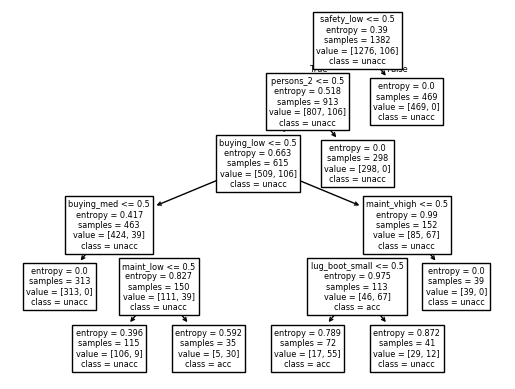

In [47]:
plot_tree(model, feature_names=X_train.columns, class_names=["unacc", "acc", "good", "vgood"])